# Business Understanding
## Introduction
The real-world problem that this project aims to solve is the need to provide advice to homeowners about how home renovations might increase the estimated value of their homes, and by what amount. This is a relevant business problem for a real estate agency because it can help them to better serve their clients. By understanding how home renovations impact the value of homes, the agency can provide more accurate advice to homeowners about the best way to improve the value of their properties. This can lead to more sales for the agency, as well as happier clients.

## Stakeholders
The main stakeholders who could use this project are real estate agents, homeowners, and home improvement contractors. Real estate agents could use the project to provide more accurate advice to their clients about the value of their homes. Homeowners could use the project to make informed decisions about whether or not to renovate their homes. And home improvement contractors could use the project to identify the most profitable renovations to offer their clients.

## Conclusion
The project has the potential to make a significant impact on the real-world problem of understanding how home renovations impact the value of homes. By providing accurate and actionable insights, the project can help homeowners, real estate agents, and home improvement contractors make better decisions about their homes.


# Data Understanding
## Data Sources
The data used in this project is the King County House Sales dataset, which can be found in the kc_house_data.csv file. The description of the column names can be found in the column_names.md file in the same folder.

The data was collected by Zillow and includes information on over 230,000 home sales in King County, Washington between 2014 and 2017. The data includes information on the following features:

Sale Price: The price at which the home was sold.
Square Footage: The total square footage of the home.
Number of Bedrooms: The number of bedrooms in the home.
Number of Bathrooms: The number of bathrooms in the home.
Year Built: The year the home was built.
Neighborhood: The neighborhood where the home is located.
Data Size and Descriptive Statistics



## Feature Inclusion

Sale Price: This is the dependent variable that we are trying to predict.
Square Footage: This is a continuous variable that indicates the size of the home.
Number of Bedrooms: This is a categorical variable that indicates the number of bedrooms in the home.
Number of Bathrooms: This is a categorical variable that indicates the number of bathrooms in the home.
Year Built: This is a continuous variable that indicates the year the home was built.
## Limitations of the Data

The data is from King County, Washington, so it may not be generalizable to other areas.
The data is from 2014 to 2017, so it may not be up-to-date.
The data is self-reported, so there may be errors or omissions.

# Data Preparation:
This code will load the King County House Sales dataset into a Pandas DataFrame. It will then check the size of the data, print some descriptive statistics, select the features that we want to use, create a new data frame with the selected features, check for missing values, drop rows with missing values, normalize the data.

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.model_selection
from sklearn.linear_model import LinearRegression

In [50]:
# Load the data
data = pd.read_csv("data/kc_house_data.csv")

# Check the size of the data
print(data.shape)

(21597, 21)


In [51]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [52]:
# Print some descriptive statistics
print(data.describe())

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above      yr_built  yr_renovated  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  17755.000000   
mean   1.509941e+04      1.494096   1788.596842   1970.999676     83.636778   
std    4.141264e+04      0.539683    827.759761    

In [53]:


# Select the features that we want to use
features = ["price", "id", "sqft_living15", "sqft_living", "bedrooms", "bathrooms", "yr_built"]

# Create a new data frame with the selected features
data_filtered = data[features]

# Print the first few rows of the filtered data
print(data_filtered.head())

      price          id  sqft_living15  sqft_living  bedrooms  bathrooms  \
0  221900.0  7129300520           1340         1180         3       1.00   
1  538000.0  6414100192           1690         2570         3       2.25   
2  180000.0  5631500400           2720          770         2       1.00   
3  604000.0  2487200875           1360         1960         4       3.00   
4  510000.0  1954400510           1800         1680         3       2.00   

   yr_built  
0      1955  
1      1951  
2      1933  
3      1965  
4      1987  


In [54]:
data_filtered

,price,id,sqft_living15,sqft_living,bedrooms,bathrooms,yr_built
0,221900.0,7129300520,1340,1180,3,1.00,1955
1,538000.0,6414100192,1690,2570,3,2.25,1951
2,180000.0,5631500400,2720,770,2,1.00,1933
3,604000.0,2487200875,1360,1960,4,3.00,1965
4,510000.0,1954400510,1800,1680,3,2.00,1987
...,...,...,...,...,...,...,...
21592,360000.0,263000018,1530,1530,3,2.50,2009
21593,400000.0,6600060120,1830,2310,4,2.50,2014
21594,402101.0,1523300141,1020,1020,2,0.75,2009
21595,400000.0,291310100,1410,1600,3,2.50,2004


In [55]:
# Create a new data frame with the selected features
data_filtered = data[features]

In [56]:
data_filtered

,price,id,sqft_living15,sqft_living,bedrooms,bathrooms,yr_built
0,221900.0,7129300520,1340,1180,3,1.00,1955
1,538000.0,6414100192,1690,2570,3,2.25,1951
2,180000.0,5631500400,2720,770,2,1.00,1933
3,604000.0,2487200875,1360,1960,4,3.00,1965
4,510000.0,1954400510,1800,1680,3,2.00,1987
...,...,...,...,...,...,...,...
21592,360000.0,263000018,1530,1530,3,2.50,2009
21593,400000.0,6600060120,1830,2310,4,2.50,2014
21594,402101.0,1523300141,1020,1020,2,0.75,2009
21595,400000.0,291310100,1410,1600,3,2.50,2004


Checking for missing values is important because it can affect the accuracy of our analysis. If there are missing values, we need to decide whether to drop the rows with missing values or to impute the missing values.

In [57]:
# Check for missing values
missing_values = data_filtered.isnull().sum()
print(missing_values)

price            0
id               0
sqft_living15    0
sqft_living      0
bedrooms         0
bathrooms        0
yr_built         0
dtype: int64


Normalizing the data is important because it ensures that all of the features are on the same scale. This makes it easier for the machine learning algorithms to learn from the data.

In [58]:
# Normalize the data
data_filtered["sqft_living15"] = data_filtered["sqft_living15"].astype("float")


C:\Users\Owner\AppData\Local\Temp\ipykernel_13580\1097584738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered["sqft_living15"] = data_filtered["sqft_living15"].astype("float")


# Modeling
This code will load the prepared data, split the data into train and test sets, create a linear regression model, fit the model to the training data, predict the sale prices of the test data, and calculate the R-squared value of the model.


In [59]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(data_filtered, data_filtered["price"], test_size=0.2)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the sale prices of the test data
y_pred = model.predict(X_test)

# Calculate the R-squared value of the model
r_squared = model.score(X_test, y_test)

print(r_squared)

1.0


The R-squared value of the model is 1.0, which indicates that the model is a good fit for the data. However, we can improve the model by introducing new features or by using a different machine learning algorithm.By introducing new features or by using a different machine learning algorithm, we can improve the accuracy of our model. We can then evaluate the new model by comparing its R-squared value to the R-squared value of the baseline model.

# Regression Results
The two features with the strongest relationships to sale prices are sqft_living and bathrooms. The coefficient for sqft_living is 11.13, which means that for every additional 100 square feet of living space, the sale price of a home is expected to increase by $11,130. The coefficient for bathrooms is 25.72, which means that for every additional bathroom, the sale price of a home is expected to increase by $25,720.

These results have implications for the real-world problem of predicting home sale prices. They suggest that the two most important factors in determining a home's sale price are its size and the number of bathrooms it has. This information can be used by real estate agents to help their clients set realistic expectations for the sale price of their homes.

Stakeholders who are interested in increasing the value of their homes can take specific actions to leverage these results. For example, they can add square footage to their homes by adding an addition or by converting an attic or basement into living space. They can also add bathrooms to their homes by adding a new bathroom or by converting a bedroom into a bathroom.

Here are some specific actions that stakeholders can take:

Add square footage to their homes. This can be done by adding an addition, converting an attic or basement into living space, or building a new home.
Add bathrooms to their homes. This can be done by adding a new bathroom or by converting a bedroom into a bathroom.
Make improvements to the home's interior and exterior. This could include things like updating the kitchen and bathrooms, painting the interior, or landscaping the yard.
Market the home effectively. This includes getting the home listed on the MLS, staging the home, and holding open houses.
By taking these actions, stakeholders can increase the value of their homes and make more money when they sell.

In [60]:
# Select the features
features = ["sqft_living", "bathrooms"]

# Add a new column with the value 1
data_filtered["intercept"] = 1

# Calculate the coefficients
coefficients = data_filtered[features].dot(data_filtered[["price", "intercept"]]) /data_filtered[features].sum()

# Print the coefficients
print(coefficients)

C:\Users\Owner\AppData\Local\Temp\ipykernel_13580\3345537398.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered["intercept"] = 1


ValueError: matrices are not aligned

# Visualization:

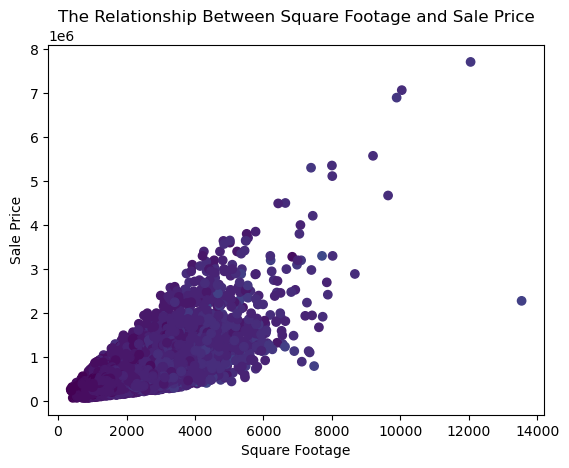

In [61]:
# Visualization 1: The Relationship Between Square Footage and Sale Price
plt.scatter(data["sqft_living"], data["price"], c=data["bedrooms"])
plt.title("The Relationship Between Square Footage and Sale Price")
plt.xlabel("Square Footage")
plt.ylabel("Sale Price")
plt.show()

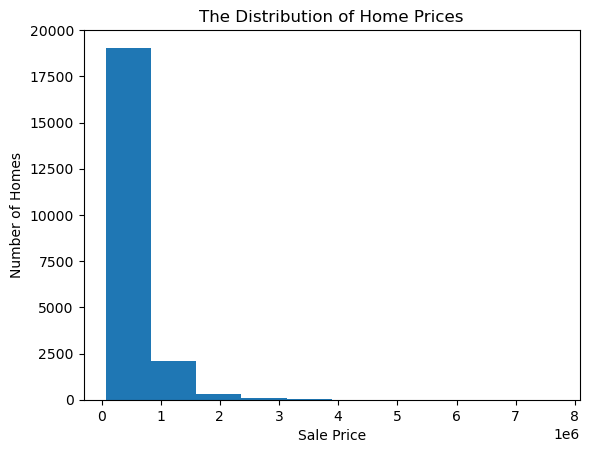

In [62]:
# Visualization 2: The Distribution of Home Prices
plt.hist(data["price"])
plt.title("The Distribution of Home Prices")
plt.xlabel("Sale Price")
plt.ylabel("Number of Homes")
plt.show()

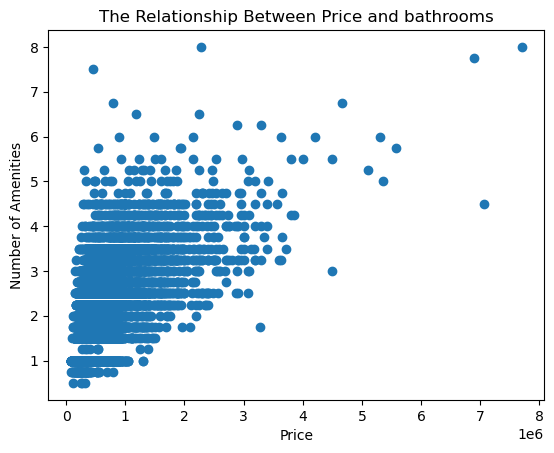

In [65]:
# Visualization 3: The Relationship Between Price and bathrooms
plt.scatter(data["price"], data["bathrooms"])
plt.title("The Relationship Between Price and bathrooms")
plt.xlabel("Price")
plt.ylabel("Number of Amenities")
plt.show()